
<a name="T_38F77E06"></a>

# <span style="color:rgb(213,80,0)">МЕТОДЫ ОПТИМИЗАЦИИ</span>
<a name="beginToc"></a>

## Table of Contents
[Семинар 11. Метод градиентного поиска](#H_69FF6A30)

&emsp;&emsp;[Немного векторного анализа](#H_734C9459)

&emsp;&emsp;[Задача метода наименьших вадратов в диадной форме](#H_5AADC763)

&emsp;[Оператор градиента](#H_3F79CB39)

&emsp;&emsp;[Градиент вектора](#H_E0526770)

&emsp;&emsp;[Реализация алгоритма численного расчета градиента скалярной функции](#H_16F31CAA)

&emsp;&emsp;[Простая скалярная функция векторного аргумента \- квадратичная форма](#H_C3B0D20E)

&emsp;&emsp;[Итерационная оптимизация](#H_AE1D7181)

&emsp;&emsp;[Градиентная итерационная оптимизация](#H_83E0AABA)

&emsp;&emsp;[Оптимизация скалярной функции скалярного аргумента](#H_DE521E7B)

&emsp;&emsp;[Оптимизация скалярной функции векторного аргумента](#H_EB3C01D7)

<a name="endToc"></a>
<a name="H_69FF6A30"></a>

## Семинар 11. Метод градиентного поиска
<a name="H_734C9459"></a>

#### Немного векторного анализа

Вектор  \- это не столбик чисел, а сумма базисных векторов


$$\vec{a} =a_1 {\hat{e} }_1 +...+a_N {\hat{e} }_N$$

 ${\hat{e} }_i$ \- базисный вектор (для простоты будем считать, что все базисыные вектора взаимоортогональны и имеют единичную длину)


Строго говоря плюсик при суммировании векторов \- это не тот же плюсик, что при суммировании чисел, но обычно используют тот же значок.


Координаты вектора:


 $a_i ={\hat{e} }_i \cdot \vec{a} ={\hat{e} }_i \cdot \sum_j a_j {\hat{e} }_j =a_i$ так как ${\hat{e} }_i \cdot {\hat{e} }_j =0$ если $j\not= i$


Диада \- два вектора:


 $\overleftrightarrow{d} =\vec{a} \otimes \vec{b} =\vec{a} \vec{b}$ , $\otimes$ \- тензорное произведение, в отличие от скалярного произведения и обычного произведени чисел оно некоммутативно, в остальном ведет себя также как скалярное произведение.


Вектора могут принадлежать разным векторным пространствам.


Диады можно скалярно умножать на вектор слева и справа, при этом из пары векторов диады умножается тот вектор, который стоит ближе


$$\overleftrightarrow{d} \cdot \vec{c} =\vec{a} \vec{b} \cdot \vec{c}$$

Правый вектор диады и вектор на который умножаем справа должны принадлежать одному и тому же пространству:


$$\overleftrightarrow{d} \cdot \vec{c} =\vec{a} (\sum_i b_i {\hat{u} }_i )\cdot (\sum_i c_i {\hat{u} }_i )=\vec{a} \sum b_i c_i$$

, это похоже на $\vec{a} {\vec{b} }^T \vec{c}$


$$\vec{a} =a_1 {\hat{e} }_1 +...+a_N {\hat{e} }_N$$

$$\vec{b} =b_1 {\hat{u} }_1 +...+b_M {\hat{u} }_M$$

$$\overleftrightarrow{d} =\vec{a} \vec{b} =\sum_{i=1}^N \sum_{j=1}^M a_i b_j {\hat{e} }_i {\hat{u} }_j$$

Координаты диады можно сложить в таблицу, которая называется матрицей, номер строки будет соответствовать индексу базисного вектора "левого" пространства (пространство столбцов), а индекс столбца \- индексу базисного вектора "правого" пространства (пространство строк):


In [1]:
clearvars
a= sym("a",[3,1])

In [2]:
b = sym("b",[2 1],"real")

In [3]:
a*b'


Сумму диад называют  диадиком.


Теперь, допустим у нас есть матрица $A=[{\vec{a} }_1 \ldots{\vec{a} }_j \ldots{\vec{a} }_m ]$ , состоящая из столбцов ${\vec{a} }_j$ , ее содержимое \- это координаты диадика:


$$\overleftrightarrow{A} ={\vec{a} }_1 {\hat{u} }_1 +\ldots{\vec{a} }_i {\hat{u} }_j +\ldots{\vec{a} }_m {\hat{u} }_m$$

То есть, это сумма диад,  ${\hat{u} }_i$ \- базисные вектора пространства строк. Каждый из вектор\-столбцов, в свою очередь, это линейная комбинация базисных векторов пространства столбцов: ${\vec{a} }_j =\sum_{j=1}^n a_{ij} {\hat{e} }_i$ , соотвественно матрица $A$ \- это координаты диадика состоящего из $m\times n$ диад. Диада $\overleftrightarrow{A}$ действует на вектор, принадлежащий пространству строк (базис  ${\hat{e} }_i$ ), соотвественно:


$$\overleftrightarrow{A} \cdot \vec{c} =\vec{a} (\sum_i b_i {\hat{u} }_i )\cdot (\sum_i c_i {\hat{u} }_i )=\vec{a} \sum b_i c_i$$

Матрица  \- форма записи координат диадиков (суммы диад)


$$\overleftrightarrow{B} ={\vec{b} }_1 {\hat{u} }_1 +\ldots+{\vec{b} }_m {\hat{u} }_m$$
<a name="H_5AADC763"></a>

#### Задача метода наименьших вадратов в диадной форме

В качестве упражнения сформулируем задачу линейной регрессии в диадной форме.


Задача линейной регрессии состоит в том, чтобы найти такой вектор параметров $\vec{b}$ , который минимизирует скалярную функция невязки $\Phi (\vec{b} )$ \-  модуль вектора ошибки:


$$argmin(\Phi (\vec{b} ))~где~\Phi (\vec{b} )=||\vec{r} ||^2$$

Вектор $\vec{r}$ \- это разница между предсказанием нашей линейной модели ( $X\vec{b}$ ) и экспериментально наблюдаемым вектором $\vec{y}$ .


Раньше мы записывали невязку так:


$$\Phi (\vec{b} )={\vec{r} }^T \vec{r} =||X\vec{b} -\vec{y} ||^2 =(X\vec{b} -\vec{y} )^T (X\vec{b} -\vec{y} )$$

В тензорной записи она будет выглядеть так:


$$\Phi (\vec{b} )=\vec{r} \cdot \vec{r} =||\overleftrightarrow{X} \cdot \vec{b} -\vec{y} ||^2 =(\overleftrightarrow{X} \cdot \vec{b} -\vec{y} )\cdot (\overleftrightarrow{X} \cdot \vec{b} -\vec{y} )$$

 $X<=>\overleftrightarrow{X} =\sum_{ij} x_{ij} {\hat{e} }_i {\hat{u} }_j$  \- диада предикторов


$$\vec{y} =\sum_i y_i {\hat{e} }_i ,\vec{b} =\sum_k b_k {\hat{u} }_k$$

 ${\hat{e} }_i$  \- базисные вектора пространства столбцов  \- то есть, это то пространство, в котором "живут"  вектора размером с вектор наших измеренных точек, в этом пространстве живут столбцы матрицы предикторов, вектор экспериментальных точек


 ${\hat{u} }_j$ \- базисные вектора пространства строк  \- то есть, это то пространство, в котором живут вектора размером с вектор коэффициентов, в этом пространстве живет вектор $\vec{b}$

<a name="H_3F79CB39"></a>

### Оператор градиента

Дифференциальный оператор градиента:

<a name="M_27B507C0"></a>

$$\nabla =\sum_i {\hat{x} }_i \frac{\partial }{\partial x_i }$$

 $f(\vec{x} )$ \- скалярная функция векторного аргумента, где $\vec{x} \in R^n$ \- вектор переменных оптимизации.


тогда градиент этой функции в пространстве $R^n$ имеет вид :


$$\nabla f(\vec{x} )=\begin{array}{c} \frac{\partial f}{\partial x_1 }\newline \vdots \newline \frac{\partial f}{\partial x_n } \end{array}$$

Градиент   \-  это вектор  в пространстве $R^n$ , который указывает в сторону наибольшего возрастания функции $f(\vec{x} )$ .


Основные свойства оператора градиента:


$$\nabla (f(\vec{x} )g(\vec{x} ))=g\nabla f+f\nabla g$$

Градиент вектора:


$$\vec{r} (\vec{x} )=r_1 (\vec{x} ){\hat{e} }_1 +....+r_n (\vec{x} ){\hat{e} }_n$$

То есть, $r_i (\vec{x} )$ \- это некоторые скалярные функции векторного аргумента, тот факт, что вектор $\vec{x}$ и вектор $\vec{r}$ принадлежат разным векторным пространствам нас не смущает. Также мы предполагаем, что базисные вектора ${\hat{e} }_i$ не зависят от $\vec{x}$ . Базисные вектора пространства вектора $\vec{x}$ это ${\hat{x} }_1 ,\ldots,{\hat{x} }_n$

<a name="H_E0526770"></a>

#### Градиент вектора

В соотвествии с [формулой](#M_27B507C0):


$$\nabla \vec{r} =\sum_{i,j} \frac{\partial r_j }{\partial x_i }{\hat{x} }_i {\hat{e} }_j$$

Это матрица Якоби.


Отсюда легко видеть, что, если скалярная функция векторного аргумента представляет собой скалярное произведение некоторых векторов $f=\vec{a} \cdot \vec{b}$ , то:


$$\nabla f=(\nabla \vec{a} )\cdot \vec{b} +\vec{a} \cdot (\nabla \vec{b} )$$

В частности градиент модуля некоторого вектора будет:


$$\nabla (\vec{r} \cdot \vec{r} )=2((\nabla \vec{r} )\cdot \vec{r} )$$

Зачем это нужно мы узнаем в следующйе серии.

<a name="H_16F31CAA"></a>

#### Реализация алгоритма численного расчета градиента скалярной функции

Функция численного расчета для расчета градиента скалярной функции векторного аргумента может иметь следующий код:

<pre>
% файл num_grad.m в корневой папке скрипта
function df = num_grad(f,x)
    % Простая функция для расчета градиента функции f,
    % переданной как указатель
    % аргументы:
    %       f - указатель на функцию
    %       x - координата,  в которой нужно посчитать df
    N = numel(x);
    x = x(:);
    dx = 50*eps;
    df = zeros([N 1]); % аллокация памяти под выходной вектор
    fx = f(x); % значение функции в точке x
    for ii=1:N
        p = x;
        p(ii) = p(ii) + dx;
        df(ii) = (f(p) -fx)/dx;
    end
end
</pre>

Функция **num\_grad** находится в файле  **num\_grad.m,** в той же папке, что и данный скрипт. Отличие от функции расчета производной, которая вводилась ранее, в том, что для расчета градиента мы варьируем отдельно каждую из координат (частная производная), которые затем складываем в один вектор (градиент скалярной функции).

<a name="H_C3B0D20E"></a>

#### Простая скалярная функция векторного аргумента \- квадратичная форма

Рассмотрим поведение квадратичной формы (скалярная функция векторного аргумента):


 $F(\vec{x} )={\vec{x} }^T A\vec{x}$ , где $A$ \- некоторая матрица произвольная


Когда $F(\vec{x} )>0$ для любого $\vec{x}$ матрица называется $A$ положительно\-определенной.


Как связана положительная определенность и форма кривой?


Далее будем строить скалярную кривую в виде трехмерной поверхности и в виде контурного изображения. Вектор $\vec{x}$ будет у нас двумерным, его координаты  \- это координаты  в плоскости X,Y, то есть $\vec{x} =[\begin{array}{c} X\newline Y \end{array}]$ . Для точки трехмерной поверхности, координата Z   \- это значение функции $Z=F([\begin{array}{c} X\newline Y \end{array}])$ , где X,Y \- ее координаты. Для контурного изображения, значению Z соотвествует цвет контура, линии контура показывают области постоянного значения функции $F$ . Градиент (двумерный вектор, как и вектор $\vec{x}$ ) на картинках показан стрелочками, стрелочки указывают в направлении градиента, длина стрелочки пропорциональна длине вектора градиента.


In [4]:
cd(get_folder())
clearvars
a11 = 1.39;
a12 = 0;
a21 = 0;
a22 = 1;
A = [a11,a12;a21,a22]

A = 2x2    
1.3900         0
         0    1.0000

In [5]:
make_positive=false;
if make_positive
    A = A'*A % эта операция делает матрицу положительно определенной
end
% проверка на то, является ли матрица А положительно определенной, зачем?
if ~make_positive
    if isequal(A',A) % проверка является ли матрица симметричной
        check_A=A;
    else % матрица не симметрична
        check_A = (A' + A)/2;
    end
    try chol(check_A) % пробуем разложение холецкого (если матрица не ПО то ошибка)
         disp('Матрица А положительно определенная')
    catch ME
         disp('Матрица А не положительно определенная')
    end
end

ans = 2x2    
1.1790         0
         0    1.0000
Матрица А положительно определенная

In [6]:
f = @(x) x(:)'*A*x(:); % функция - квадратичная форма
df = @(x) num_grad(f,x); % функция численного расчета градиента (возвращает вектор)
df_abs = @(x) norm(df(x));% функция расчета модуля градиента

ax = get_next_ax();

fig1

In [7]:
fsurf(@(x,y) f([x;y]),[-1,1]) % функции fsurf и fcontour строят поверхность и контур

In [8]:
% функции, которая принимает два скалярных аргумента
hold(ax,"on")
fcontour(ax,@(x,y) f([x;y]),[-1,1])


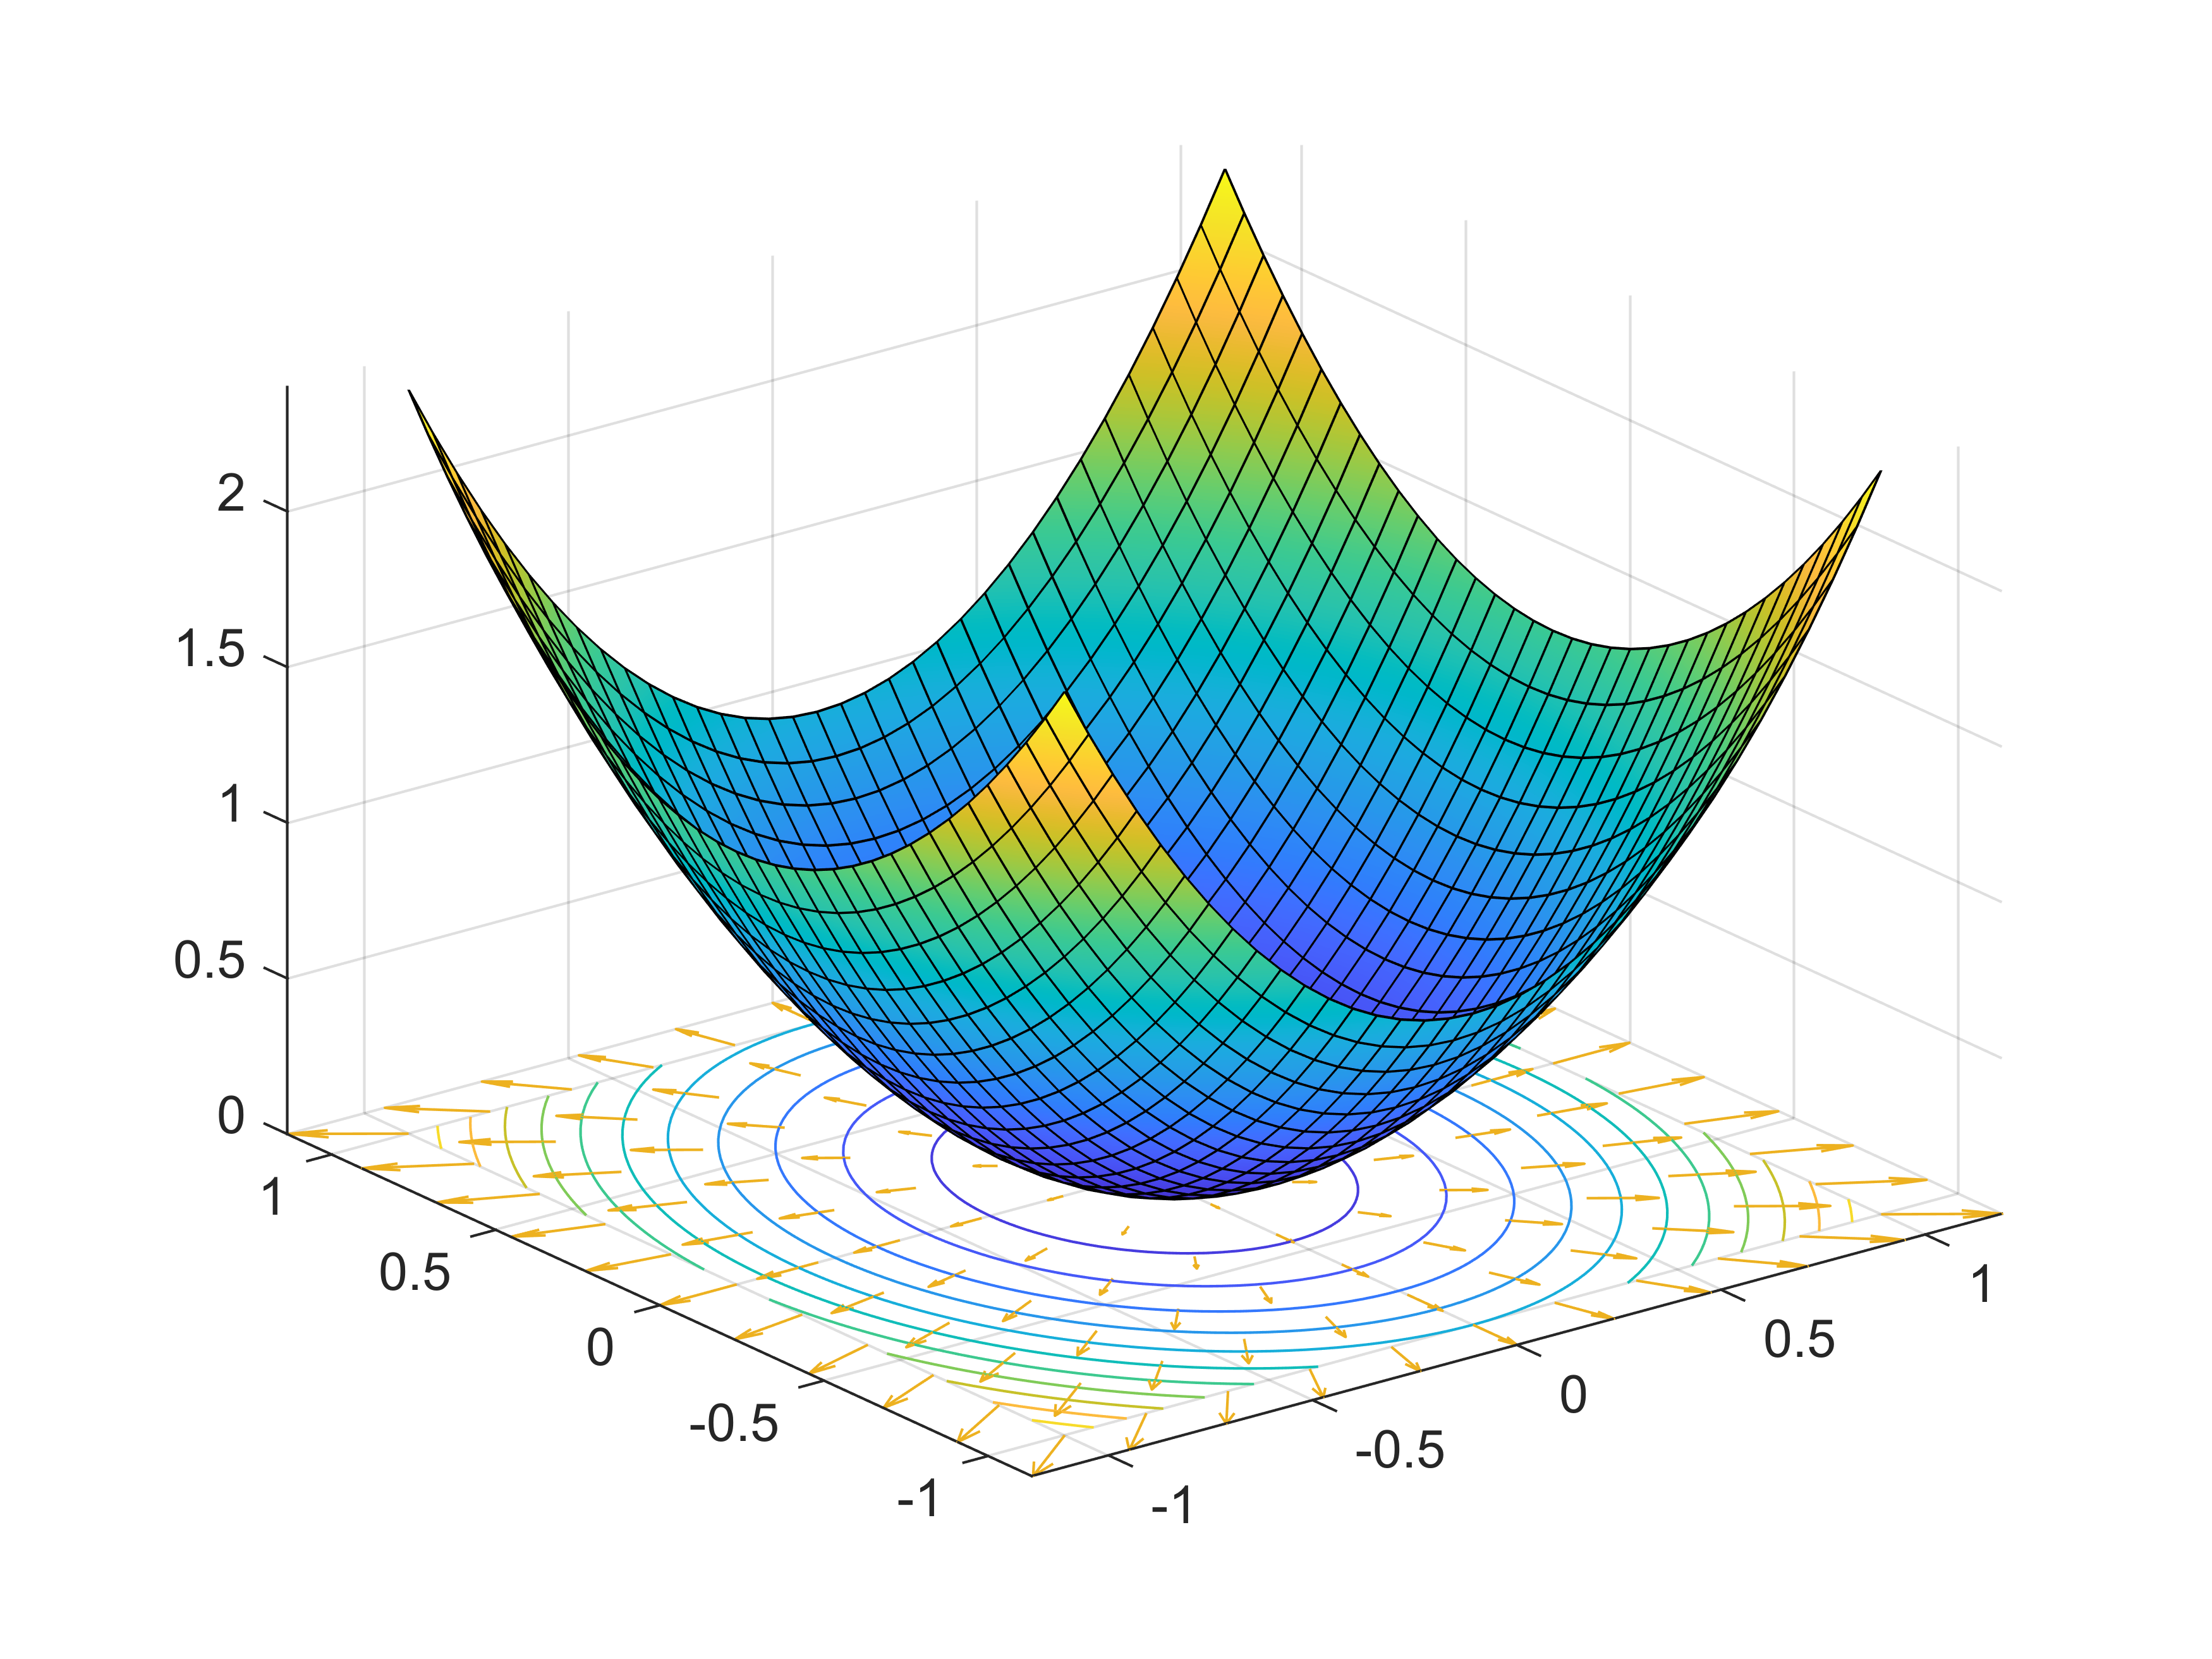

In [9]:
hold(ax,"off")

% теперь построим градиент
spacing = 0.2;
[X,Y] = meshgrid(-1:spacing:1,-1:spacing:1);
U = X;V=X;F_value=X;G_module = X;

for ii =1:size(X,1)
    for jj=1:size(Y,2)
        x = X(ii,jj);y = Y(ii,jj);
        G_value = df([x;y]);
        F_value(ii,jj) = f([x;y]);
        G_module(ii,jj) = sqrt(G_value'*G_value);
        U(ii,jj) = G_value(1);
        V(ii,jj) = G_value(2);
    end
end
hold(ax,"on")
q = quiver(ax,X,Y,U,V);
hold(ax,"off")

In [10]:
% тоже самое, только на плоскости
ax = get_next_ax();

fig2


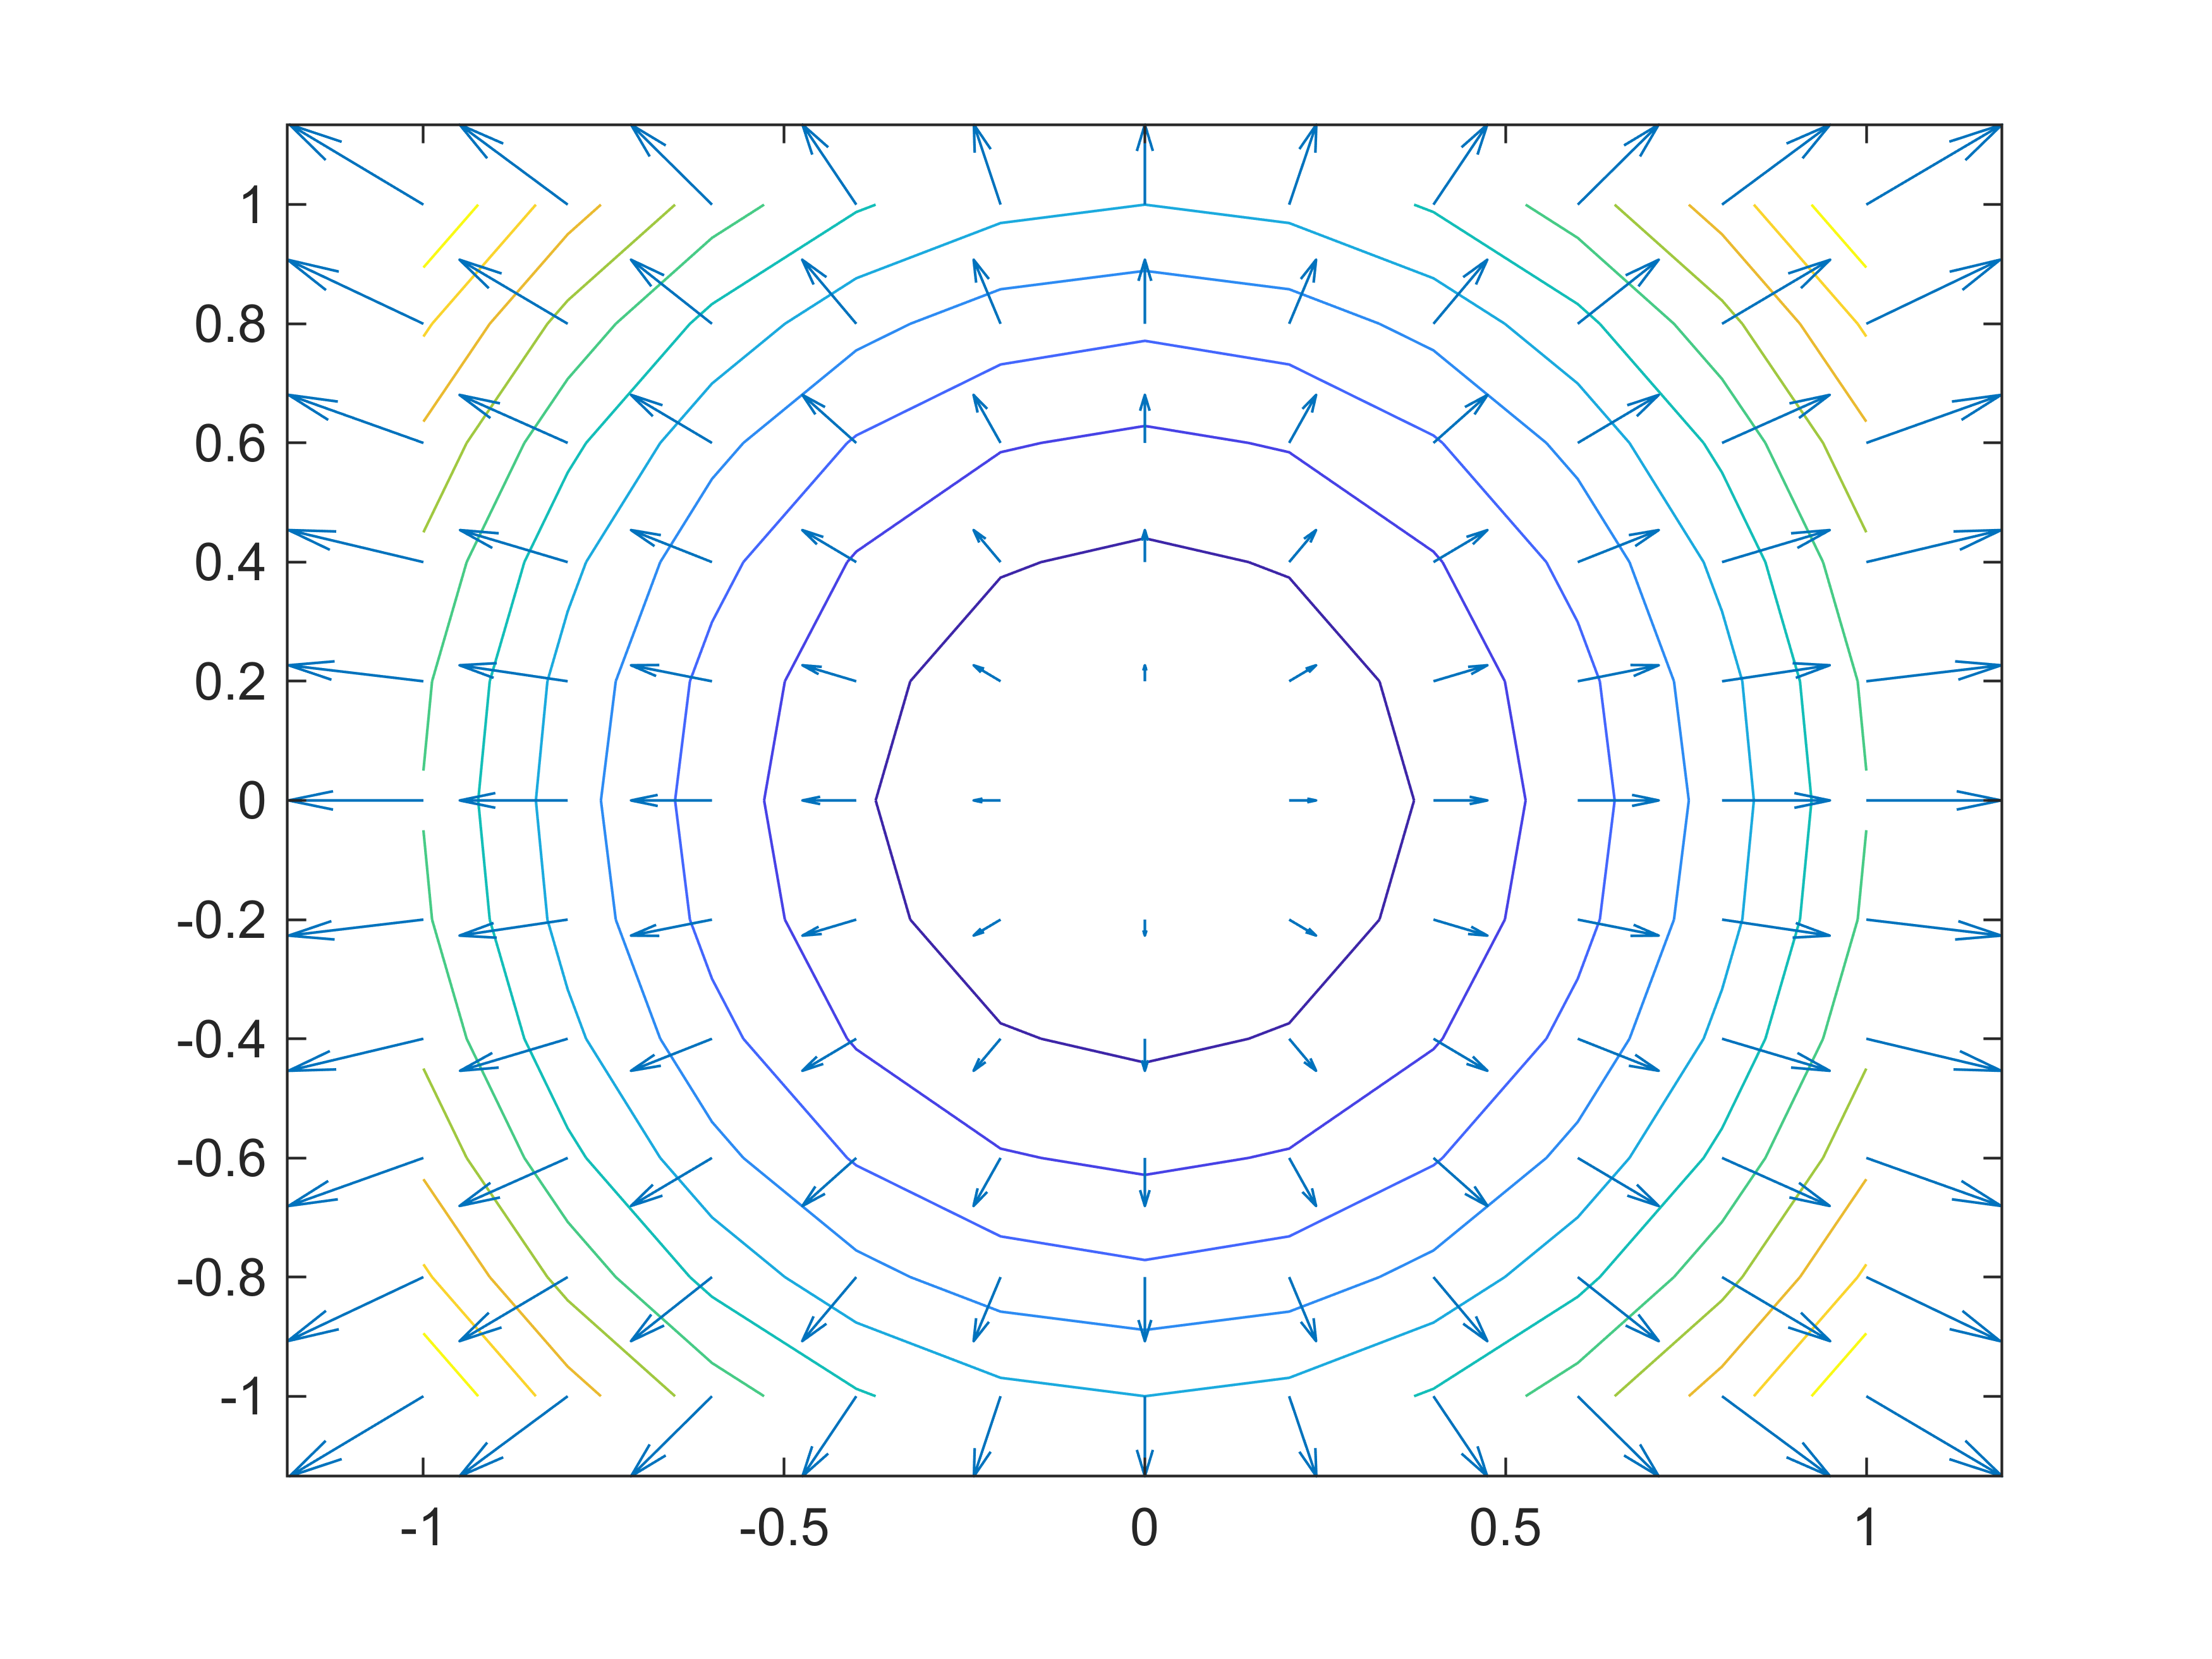

In [11]:
contour(ax,X,Y,F_value);
hold(ax,"on")
quiver(ax,X,Y,U,V)
hold(ax,"off")


Обратите внимание на область нулевого градиента (область где стрелочки становятся сосем короткими), как она связана с формой кривой поверхности ?


Также следует обратить внимание, что вектор градиента перпендикулярен изолиниям.

<a name="H_AE1D7181"></a>

#### Итерационная оптимизация

Общая идея итерационной оптимизации состоит в том, чтобы "двигаться" в пространстве параметров оптимизации по шажкам, положение точки на $i$ \- м шаге итерации определяется вектором  ${\vec{x} }_i$ . Таким образом, идея итрационной оптимизации состоит в том, чтобы из текущего положения ${\vec{x} }_i$ перейти в новую точку ${\vec{x} }_{i+1}$ , которая будет ближе к точке локального минимума ${\vec{x} }^*$ :


$${\vec{x} }_{i+1} ={\vec{x} }_i +\vec{p} ({\vec{x} }_i \ldots)$$

Вектор $\vec{p} ({\vec{x} }_i \ldots)$ \- это шаг итерации, собственно, задача алгоритма и состоит в том, чтобы рассчитать величину этого шага.  В самом простом случае шаг рассчитывается на основе координат текущей точки, но может использовать и данные о предыдущих точках ( $\vec{p} ({\vec{x} }_i ,{\vec{x} }_{i-1} ,{\vec{x} }_{i-2} \ldots)$ ), например, как в методе сопряженных градиентов. Также сущесвую алгоритмы, которые на кажой итерации рассчитывают не одну а несколько точек. В этом случае алгоритм сожет использовать данные о других точках, которые "существуют" в пространстве одновременной с ним. Примероми таких алгоритмом могут служить метод Нелдера\-Мида, эволюционный алгоритмы (particle swarm, genetic, simulated annealing  и др.)

<a name="H_83E0AABA"></a>

#### Градиентная итерационная оптимизация

Градиентный оптимизатор \- это итерационный алгоритм, который "движется" в пространстве параметров оптимизации от точке к точке, так что на кадом шаге итерации  направление вектора перехода от точки к точки противоположно направлению градиента (то есть, направлению максимального возрастания функции). Поэтому ( $i+1$ ) координата в пространстве  $R^n$ выражается через предыдущую точку и градиент функции в виде:


 ${\vec{x} }_{i+1} ={\vec{x} }_i -\mu \hat{g} ({\vec{x} }_i ),~где~\hat{g} ({\vec{x} }_i )=\frac{\nabla f({\vec{x} }_i )}{||\nabla f({\vec{x} }_i )||}$ ,


 $\mu$ \- скалярный параметры алгоритма (длина шага), который пока фиксирован, вектор  $\hat{g} ({\vec{x} }_i )$ \- это вектор единичной длины вдоль градиента, таким образом, мы  оставляем от градиента только его направление, длину шага определяет параметр $\mu$ . Этот параметр также называют "learning rate", потому, что он определяет скорость обучения модели.


Код простого оптимизатора показан ниже:

<pre>
function [x,Fval,ii,flag,search_history]=grad_search(x0,F,gradF,options)
% простой оптимизатор методом градиентного поиска
% входные аргументы:
%                   x0 - стартовая точка
%                   F - указатель на скалярную функцию векторного аргумента
%                   gradF - указатель на функцию расчета градиента функции
%                           F
%                   Опциональные аргументы в формате имя-значение
%                   mu (optional)- амплитудный коэффициент, длина шага
%                   N (optional)- ограничение на число итераций
%                   tol (optional)- точность (относительное изменение для
%                   двух последовательных итераций)
% выходные аргументы:
%                   x - оптимальное значение вектора параметров оптимизации
%                   (минимизатор)
%                   Fval - значение функции для найденного минимизатора
%                   ii - число вычислений функции и ее градиента
%                   flag - флажок критериев сходимости
%                   search_history - матрица, у которой столбцы -
%                   координаты в пространстве оптимизации, по которым ходил
%                   алгоритм
%
    arguments
        x0 double
        F function_handle
        gradF function_handle
        options.mu (1,1) double =1e-2
        options.N (1,1) double =1000
        options.tol (1,1)double =1e-6
    end
    ii=1;
    x=x0(:);mu = options.mu;N = options.N;tol = options.tol;
    flag=[true true true];
    Fval=F(x0);
    is_return_search_history = false;
    if nargout==5 % так как хранение всех точек может быть тяжелым
        is_return_search_history =true;% если число выходных аргументов равно пяти, то значит нужно сохранить историю
        search_history = NaN(numel(x),N);% резервируем память под все точки алгоритма
        search_history(:,1) = x0;
    end
    while ii<N && all(flag) % условием остановки служит достидение заданного числа итераций и проверка сходимости
        x_previous=x;
        F_previous = Fval; % значения коордианты и функции на предыдущей итерации
        grad_value = gradF(x); % рассчитываем градиент функции
        grad_norm = norm(grad_value);
        if grad_norm==0
            return
        end
        grad_direction = grad_value/norm(grad_value); % используем только направление градиента
        x= x - mu*grad_direction(:);% рассчитываем координату для следующей точки
        Fval=F(x); % рассчитываем значение функции для этой координаты
        if is_return_search_history
            search_history(:,ii+1) = x;% если нужны промежуточные точки - добавляем
        end
        % флажок проверки сходимости
        flag = [norm(Fval-F_previous)>tol ...%  изменение значения функции
            norm(x_previous-x)>tol ...
            grad_norm>tol]; %  изменение координаты
        ii=ii+1;
    end
    if is_return_search_history
        search_history = search_history(:,1:ii);
    end
end

</pre>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Данный алгоритм очень прост, в цикле мы на каждой итерации рассчитываем градиент, нормируем его, оставляя только направление, и движемся вдоль градиента с простоянным шагом (**mu**). Критерием остановки цикла является либо достижение максимального числа итераций, либо когда изменение значения функции (Fval, Fval\_previous), либо модуль шага переменных оптимизации (x,x\_previous)   для двух последовательных итераций меньше некоторого заданного значения  (**tol**).


&nbsp;&nbsp;&nbsp;&nbsp; Следует отметить, что функция ***num\_grad,*** в отличие от ***grad\_search*** не имеет блока ***arguments...end***, это связано с тем, что так как она является частью итерационного алгоритма ее вызов производится большое количество раз, поэтому она не имеет функций для валидации аргументов. В данном случае мы следуем общему правилу выполнять проверки "на входе", то есть там, где происходит взаимодействие с "внешним миром". В данном случае входом являются входные аргументы функции  ***grad\_search*** **.** Так как наш оптимизатор универсальный, хочется, чтобы он работал с любыми входными функциями, мы четко определяем типы входных аргументов, а также присваиваем значения по умолчанию для опциональных аргументов.

<a name="H_DE521E7B"></a>

#### Оптимизация скалярной функции скалярного аргумента

Посмотрим как можно применять данные функции, вначале для одномерного поиска минимума скалярной функции:


In [12]:
addpath(get_folder());
F = @(x)sin(x); % ищем минимум данной функции
gradF = @(X) num_grad(F,X) % численный расчет градиента (функция численного расчета градиента имеет два входных аргумента, в данном случае при создании анонимной функции

gradF = function_handle with value:
    @(X)num_grad(F,X)

In [13]:
% gradF, мы передаем первый аргумент num_grad  - собственно функцию, мы
% передаем как параметр, то есть она хранится в workspace данной анонимной
% функции
[xval,fval,iternumber,outflag]=grad_search(2,F,gradF,"mu",0.01)

xval = 4.7100
fval = -1.0000
iternumber = 272
outflag = 1x3 logical array    
   1   1   1

In [14]:
xval/pi

ans = 1.4992


Можно поиграться с входными опциональными аргументами grad\_search: **mu, N, tol**

<a name="H_EB3C01D7"></a>

#### Оптимизация скалярной функции векторного аргумента

Теперь решим задачу векторной оптимизации \- будем минимизировать квадратичную невязку между измеренными значениями и рассчитанными:


$$F(\vec{x} )=\Sigma_k (y_i -f_i (\vec{x} ))^2$$

 $f_i (\vec{x} )=x_1 +x_2 t_i$ , где $t_i =[0:10]$


 $y_i$ \- экспериментальные точки дискретный набор точек, который мы хотим "зафитить" функцией $f(\vec{x} ,t)$ , данная функция зависит от двух переменных оптимизации и рассчитывается для каждого знаечния независимой координаты $t_i$ , скалярная функция $F(\vec{x} )$ \- скалярная функция  \- квадратичная невязка (сумма квадратов расхождений между измеренными значениями и рассчитываемыми).


In [15]:
x_true =[7.11; 1]; % вектор истинных значений параметров
t = linspace(0,10,10)'; % вектор независимых переменных
y = x_true(1) + x_true(2)*t;% истинные значения параметров оптимизации x_true
F = @(x)sum(((x(1) + x(2)*t) - y).^2); % воркпейс функции F содержит и экспериментальные и измеренные точки
gradF = @(X) num_grad(F,X) % численный расчет градиента, воркспейс функции gradF содержит и саму функцию F

gradF = function_handle with value:
    @(X)num_grad(F,X)

In [16]:
% запускаем оптимизатор
[xval,fval,iternumber,outflag]=grad_search([0.0 0.0],F,gradF,"mu",0.001,"N",5000)

xval = 2x1    
    3.4621
1.5225
fval = 38.5265
iternumber = 5000
outflag = 1x3 logical array    
   1   1   1

In [17]:
disp("Ошибка фиттинга:" + string(norm(x_true-xval)))

Ошибка фиттинга:3.6851


Видно, что ошибка определения истинных значений имеет тот же порядок, что и длина шага (**mu**), если мы не уперлись в ограничение на число итераций (**N**).


In [18]:
% сделаем еще прогон, чтобы посмотреть как алгоритм ставит точки
mu=0.202;
[xval,~,~,~,search_history]=grad_search([2 2],F,gradF,"mu",mu,"N",200)

xval = 2x1    
    6.9006
1.1322
search_history = 2x200    
    2.0000    2.0020    2.0867    2.1846    2.2409    2.3409    2.3947    2.4934    2.5424    2.6410    2.6872    2.7853    2.8260    2.9195    2.9594    3.0516    3.0875    3.1789    3.2139    3.3028    3.3393    3.4249    3.4556    3.5417    3.5689    3.6502    3.6812    3.7624    3.7888    3.8700    3.8947    3.9740    3.9972    4.0733    4.0938    4.1688    4.1842    4.2578    4.2757    4.3489    4.3640    4.4358    4.4496    4.5180    4.5310    4.6002    4.6126    4.6817    4.6938    4.7602
    2.0000    1.7980    1.6146    1.7913    1.5973    1.7727    1.5780    1.7543    1.5583    1.7346    1.5380    1.7145    1.5167    1.6957    1.4977    1.6775    1.4787    1.6589    1.4599    1.6413    1.4426    1.6255    1.4259    1.6086    1.4085    1.5934    1.3938    1.5787    1.3785    1.5634    1.3629    1.5487    1.3480    1.5351    1.3342    1.5217    1.3203    1.5084    1.3072    1.4955    1.2941    1.4829    1.2814    1.471

In [19]:
% построим анимацию шагов работы алгоритма
animated_Line = animatedline(get_next_ax(),'Marker',"o",'LineStyle',"-");

fig3


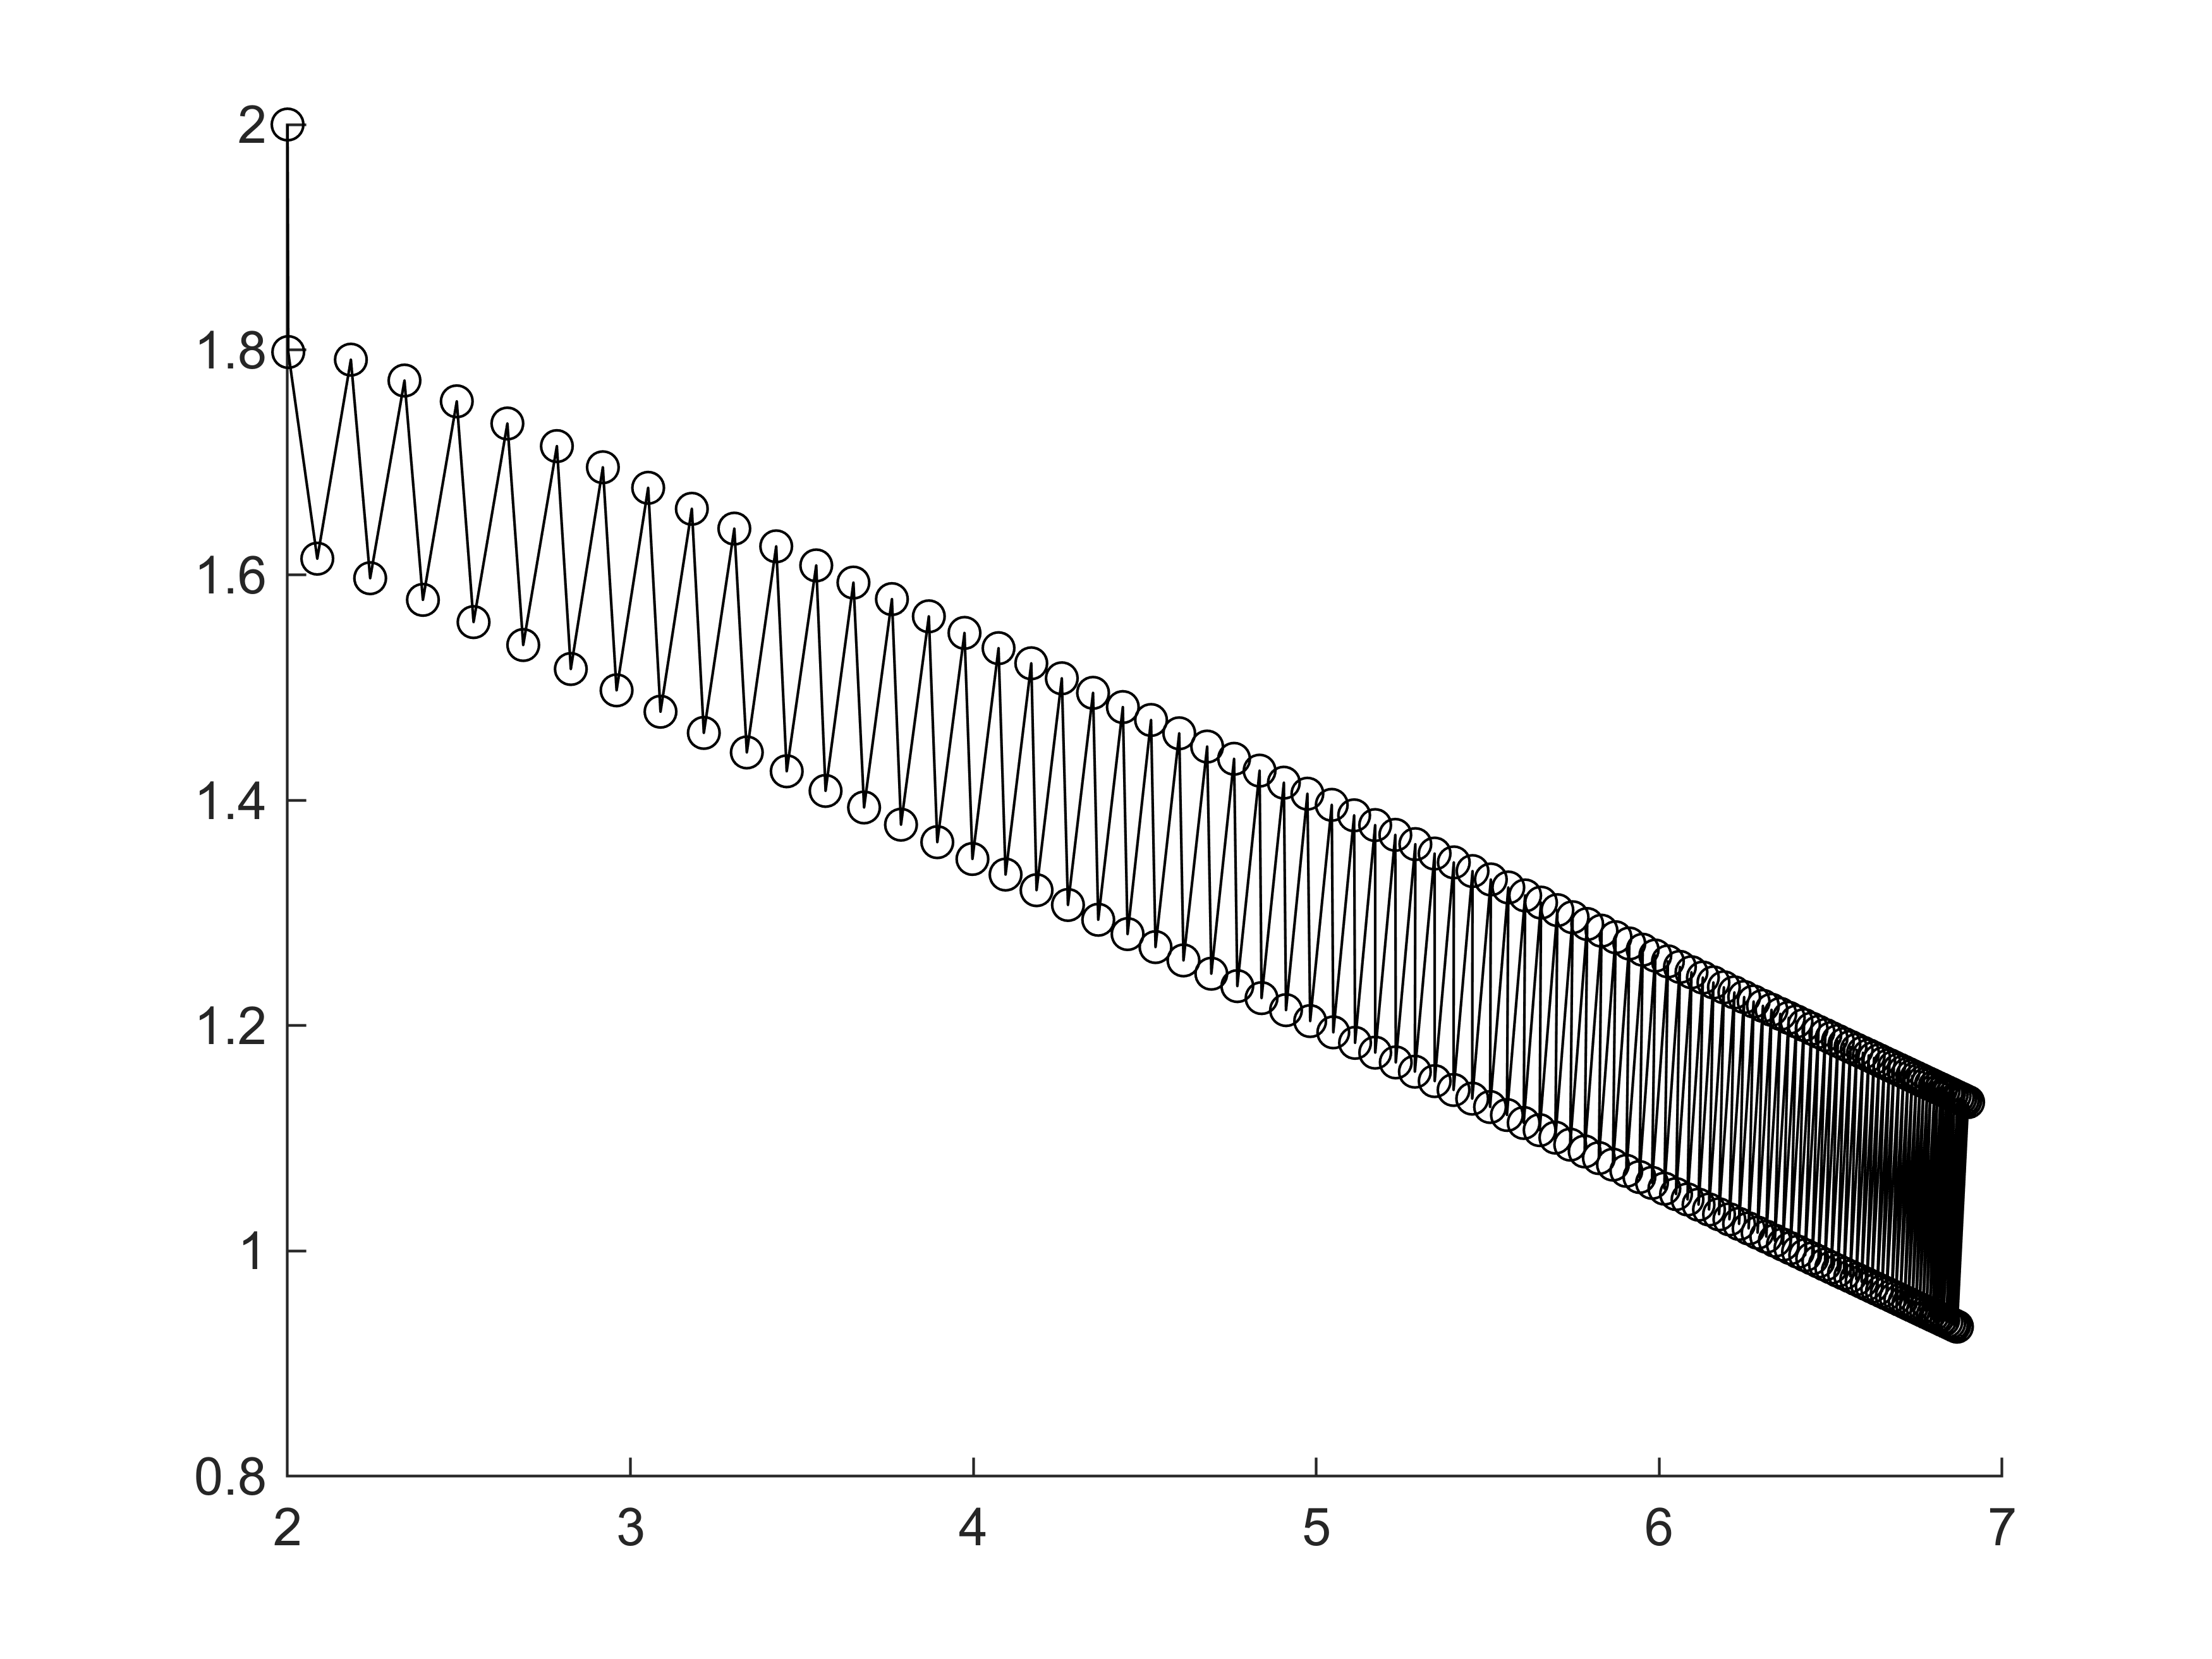

In [20]:
for ii=1:size(search_history,2)
    v = search_history(:,ii);
    addpoints(animated_Line,v(1),v(2))
    pause(0.1)
end


Интересно поварьировать величину шага  при помощи слайдера!


In [21]:
% построим контурное изображение функции невязки (чтобы убедиться что
% градиент перпендикулярен линиям постоянного уровня)
ax = animated_Line.Parent;
x_lim = ax.XLim;
y_lim = ax.YLim;
Nx = 30;Ny = 30;
x_grid = linspace(x_lim(1),x_lim(2),Nx);
y_grid = linspace(y_lim(1),y_lim(2),Ny);
[X,Y] = meshgrid(x_grid,y_grid);
Z = zeros([Ny Nx]);
for iii=1:Ny
    for jjj = 1:Nx
        Z(iii,jjj) = F([x_grid(jjj) y_grid(iii)]);
    end
end



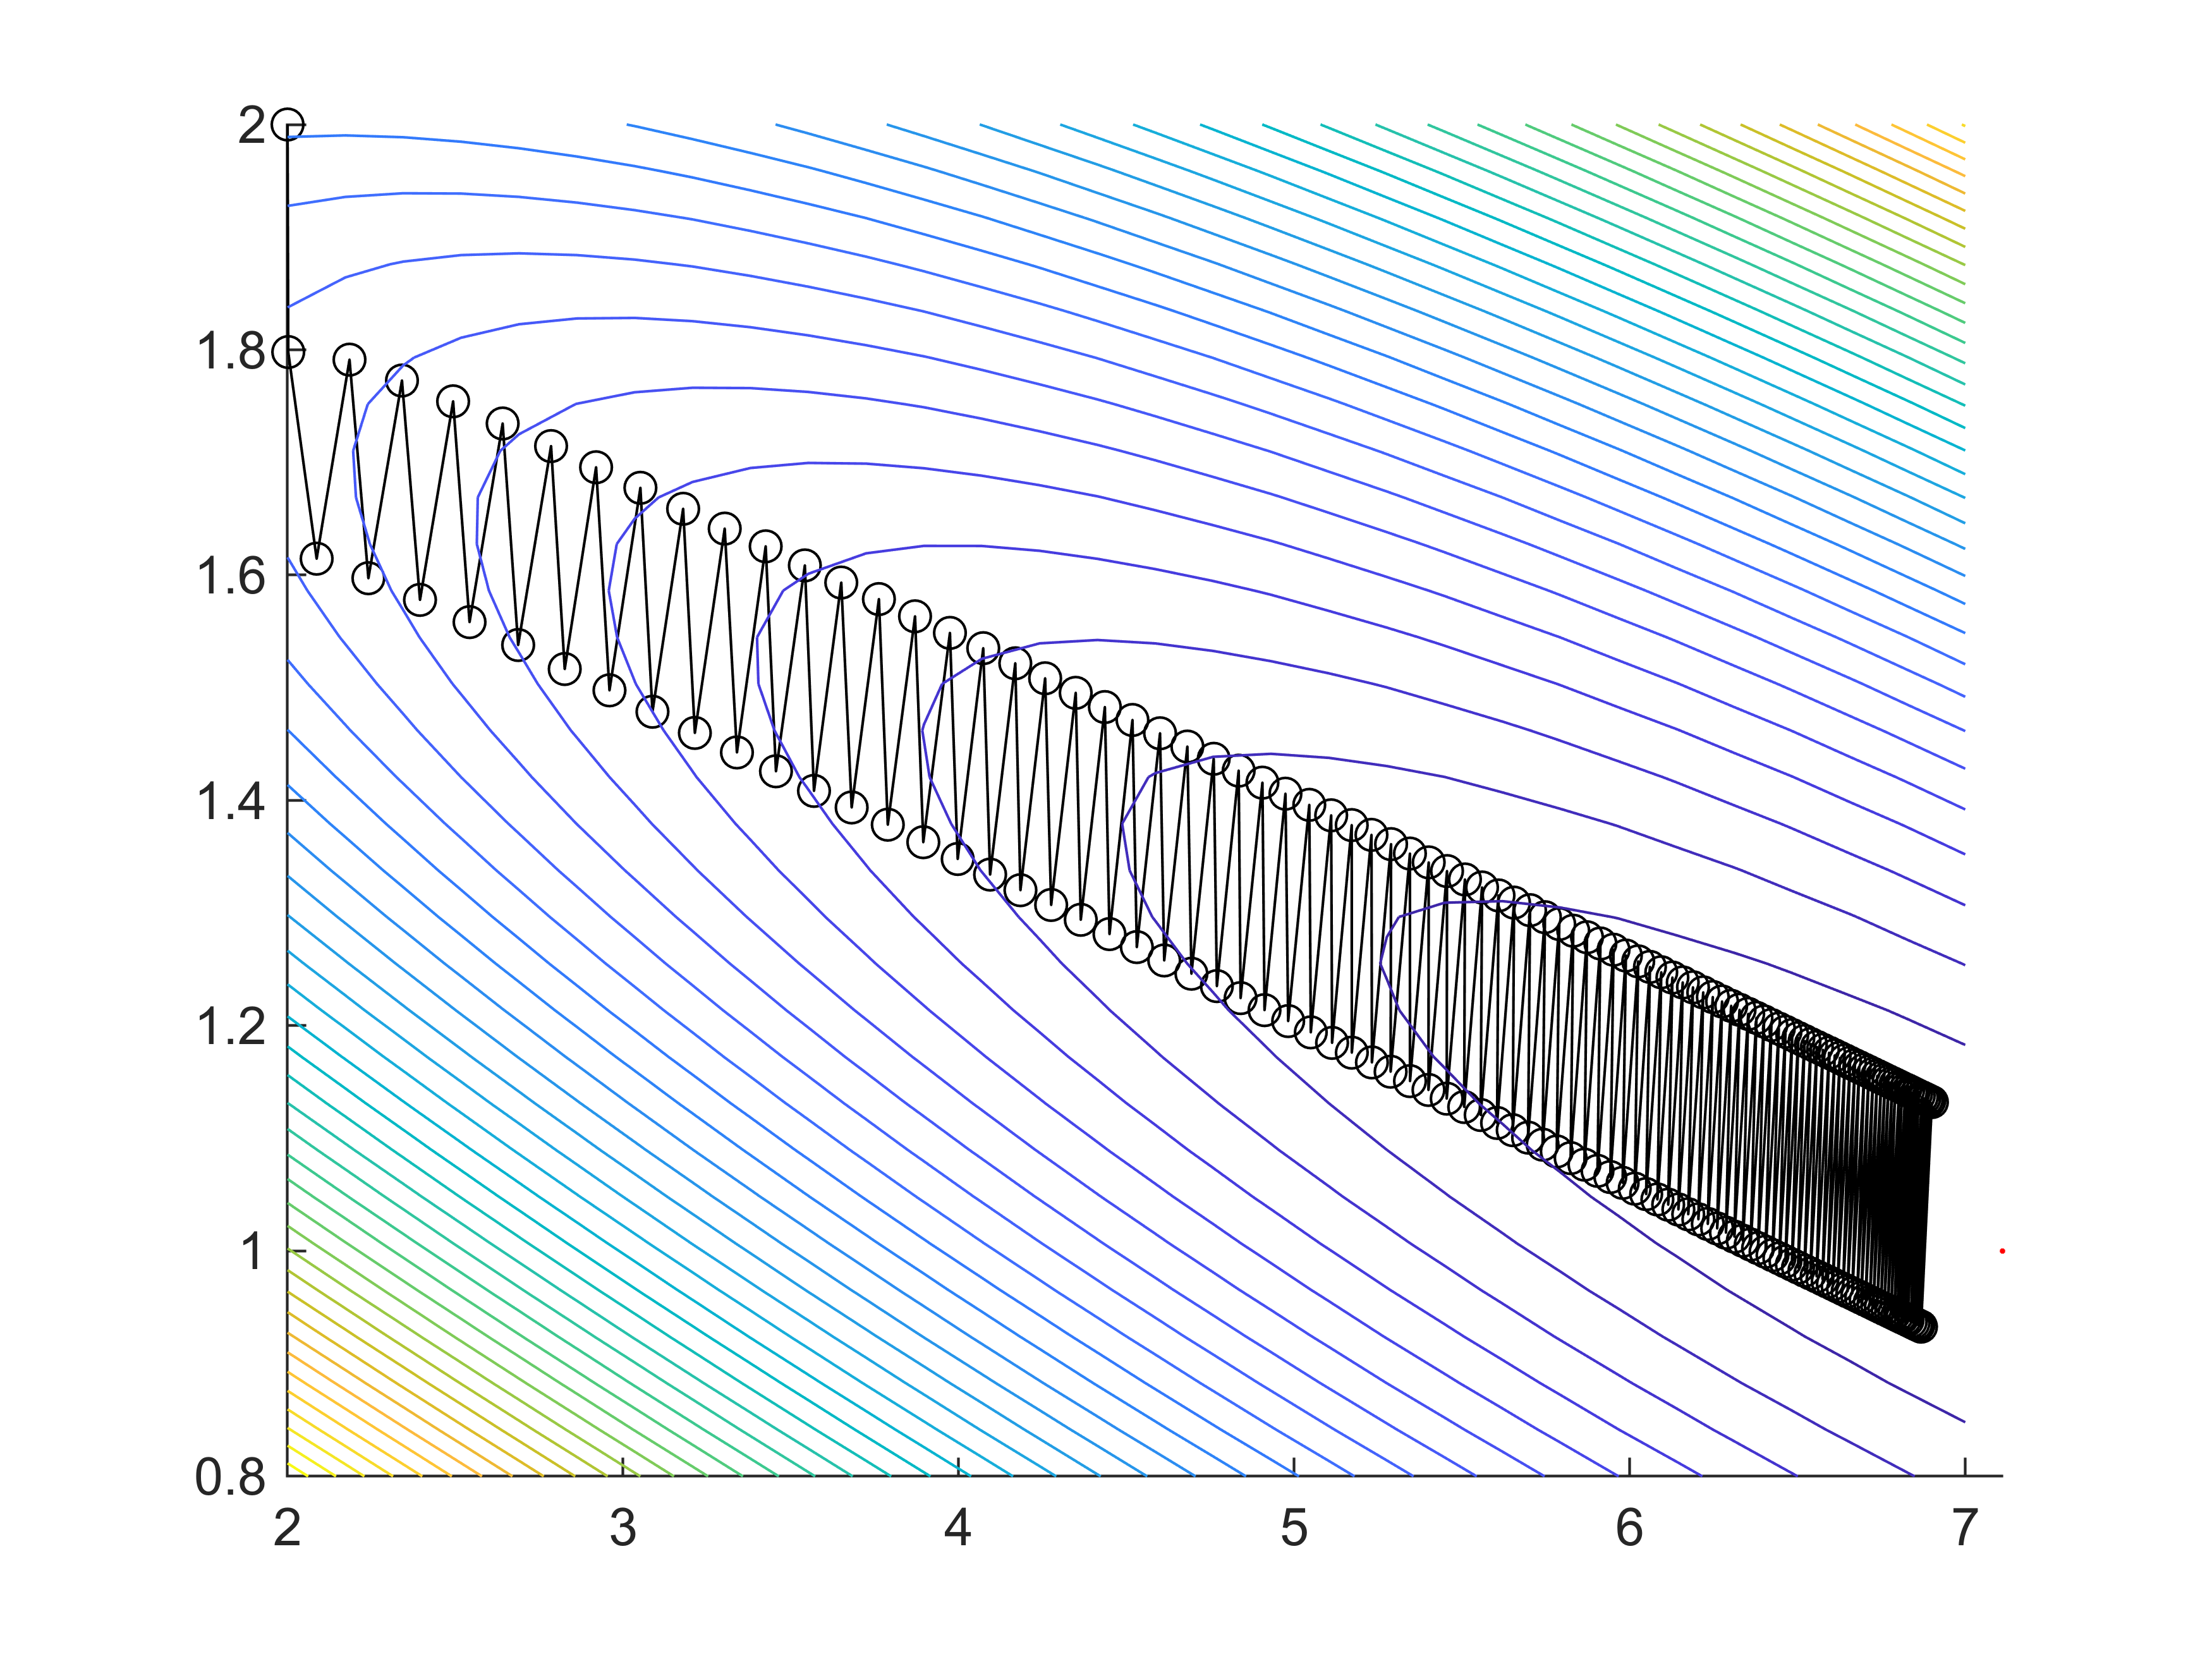

In [22]:
hold(ax,"on");
    plot(x_true(1),x_true(2),"r*","MarkerSize",1);
    contour(X,Y,Z,'LevelStep',10); % контурное изображение показывает линии постоянного значения
hold(ax,"off");


&nbsp;&nbsp;&nbsp;&nbsp; Для функции выбранной в качестве целевой, алгоритм на каждом шаге идет практически в одном и том же направлении, величина градиента слабо меняется от итерации к итерации. Поэтому алгоритм работы оптимизатора целесообразно модифицировать таким образом, чтобы после расчета направления градиента, совершать несколько пробных шагов в направлении противоположном градиенту без пересчета собственно градиента.


Если происходит уменьшение значения функции на пробном шаге, то алгоритм должен развивать успех и пытаться искать оптимальное решение в том же направлении, не пересчитывая градиент заново, подобная стратегия называется линейным поиском (linesearch). Код нашего оптимизатора может быть модифицирован следующим образом:

<pre>
function [x,Fval,ii,flag,search_history]=grad_search_linesearch(x0,F,gradF,options)
% простой оптимизатор методом градиентного спуска с линейным поиском
% параметры см GRAD_SEARCH
    arguments
        x0 double
        F function_handle
        gradF function_handle
        options.mu (1,1) double =1e-2
        options.N (1,1) double =10000
        options.tol (1,1)double =1e-6
        options.alfa (1,1) double {mustBeInRange(options.alfa,1e-4, 100)}=2 % коэффициент расширения
        options.beta (1,1) double {mustBeInRange(options.beta,1e-4, 100)}=0.5 % коэффициент сжатия
        options.tries (1,1) double {mustBeInteger, mustBePositive} = 10 % число пробных пристрелок
    end
    is_return_search_history = false;x=x0(:);mu = options.mu;N = options.N;tol = options.tol;flag=[true true];alfa = options.alfa;beta = options.beta;
    tries = options.tries;
    if nargout==5 % так как хранение всех точек может быть тяжелым
        is_return_search_history =true;% если число выходных аргументов равно пяти, то значит нужно сохранить историю
        search_history = NaN(numel(x),N+1);% резервируем память под все точки алгоритма
        search_history(:,1) = x0;
    end

    Fval=F(x0);ii=1;
    while ii<N && all(flag) % условием остановки служит достидение заданного числа итераций и проверка сходимости
        x_previous=x;
        F_previous = Fval; % рассчитываем значение функции
        grad_value = gradF(x); % рассчитываем градиент функции
        grad_norm = norm(grad_value); % модуль градиента
        if grad_norm==0
            return
        end
        grad_direction = grad_value/grad_norm; % используем только направление градиента
        grad_direction = grad_direction(:);
        jj=0;% счетчик триальных итераций
        Fval_trial=Fval;% стартовые
        mu_trial = mu;
        while (jj<=tries)% в этом цикле производим варьирования длины шага вдоль градиента
                %x_previous_trial=x_trial;
                Ftrial_previous = Fval_trial; % сохраняем значения с предыдущего шага
                mu_trial_pervious = mu_trial;
                mu_trial = mu_trial*alfa;
                x_trial= x - mu_trial*grad_direction; % рассчитываем координату для следующей пробной точки
                Fval_trial=F(x_trial);% рассчитываем значение функции для это пробной точки
                % флажок проверки сходимости, определяется изменением функции на
                % последовательных итерациях

                if is_return_search_history
                    search_history(:,ii+jj+1) = x_trial;
                end
                jj=jj+1;
                if Fval_trial<Ftrial_previous % произошло уменьшение

                else % произошло увеличение
                   mu_trial=mu_trial_pervious*beta;
                   break
                end
        end
        mu=mu_trial;
        x= x - mu*grad_direction;
        Fval=F(x);ii=ii+1;
        flag = [norm(Fval-F_previous)>tol ...
                    norm(x_previous-x)>tol ...
                    grad_norm>tol];

    end
    if is_return_search_history
        search_history = search_history(:,1:ii);
    end
end

</pre>


In [23]:
[xval,fval,iternumber,outflag,search_history]=grad_search_linesearch([0.0 0.0],F,gradF,"mu",1,"N",100,"alfa",3, "beta",0.5, "tries",15)

xval = 2x1    
    7.1047
1.0008
fval = 8.0485e-05
iternumber = 100
outflag = 1x3 logical array    
   1   1   1
search_history = 2x100    
         0    0.4967    1.3928    0.6166    1.0786    0.8839    0.8999    1.1194    1.3989    1.2808    1.5300    1.4338    2.2503    1.8310    1.9535    8.3628    5.0307    5.3096    5.4482    5.5347    5.8960    5.9335    5.8454    5.8717    5.8476    5.9048    5.8788    6.0641    5.9699    5.9877    6.5912    6.2160    6.2512    6.3163    6.3484    6.3325    6.3304    6.4137    6.4017    6.4036    6.6282    6.6049    6.6003    6.6194    6.5990    6.5957    7.3144    6.8434    6.8669    6.9046
         0    2.9586    5.8313   -0.0383    2.7761    1.5214    1.9575    1.7111    2.2586    1.7209    2.0907    1.7700    2.5288    1.3544    1.7318   11.5242   -2.4591   -0.6782    0.2129    0.6581    1.2118    0.7533    1.3782    1.2613    1.1632    1.2199    1.1697    1.3006    1.0866    1.1579    1.7067    0.8579    0.9780    1.0810    1.2198    1.071

In [24]:
disp("Относительняа ошибка фиттинга:" + string(norm(x_true-xval)/norm(x_true)))

Относительняа ошибка фиттинга:0.0007416

In [25]:

% построим анимацию шагов работы алгоритма
animated_Line = animatedline(get_next_ax(),Marker="o",LineStyle="-");

fig1


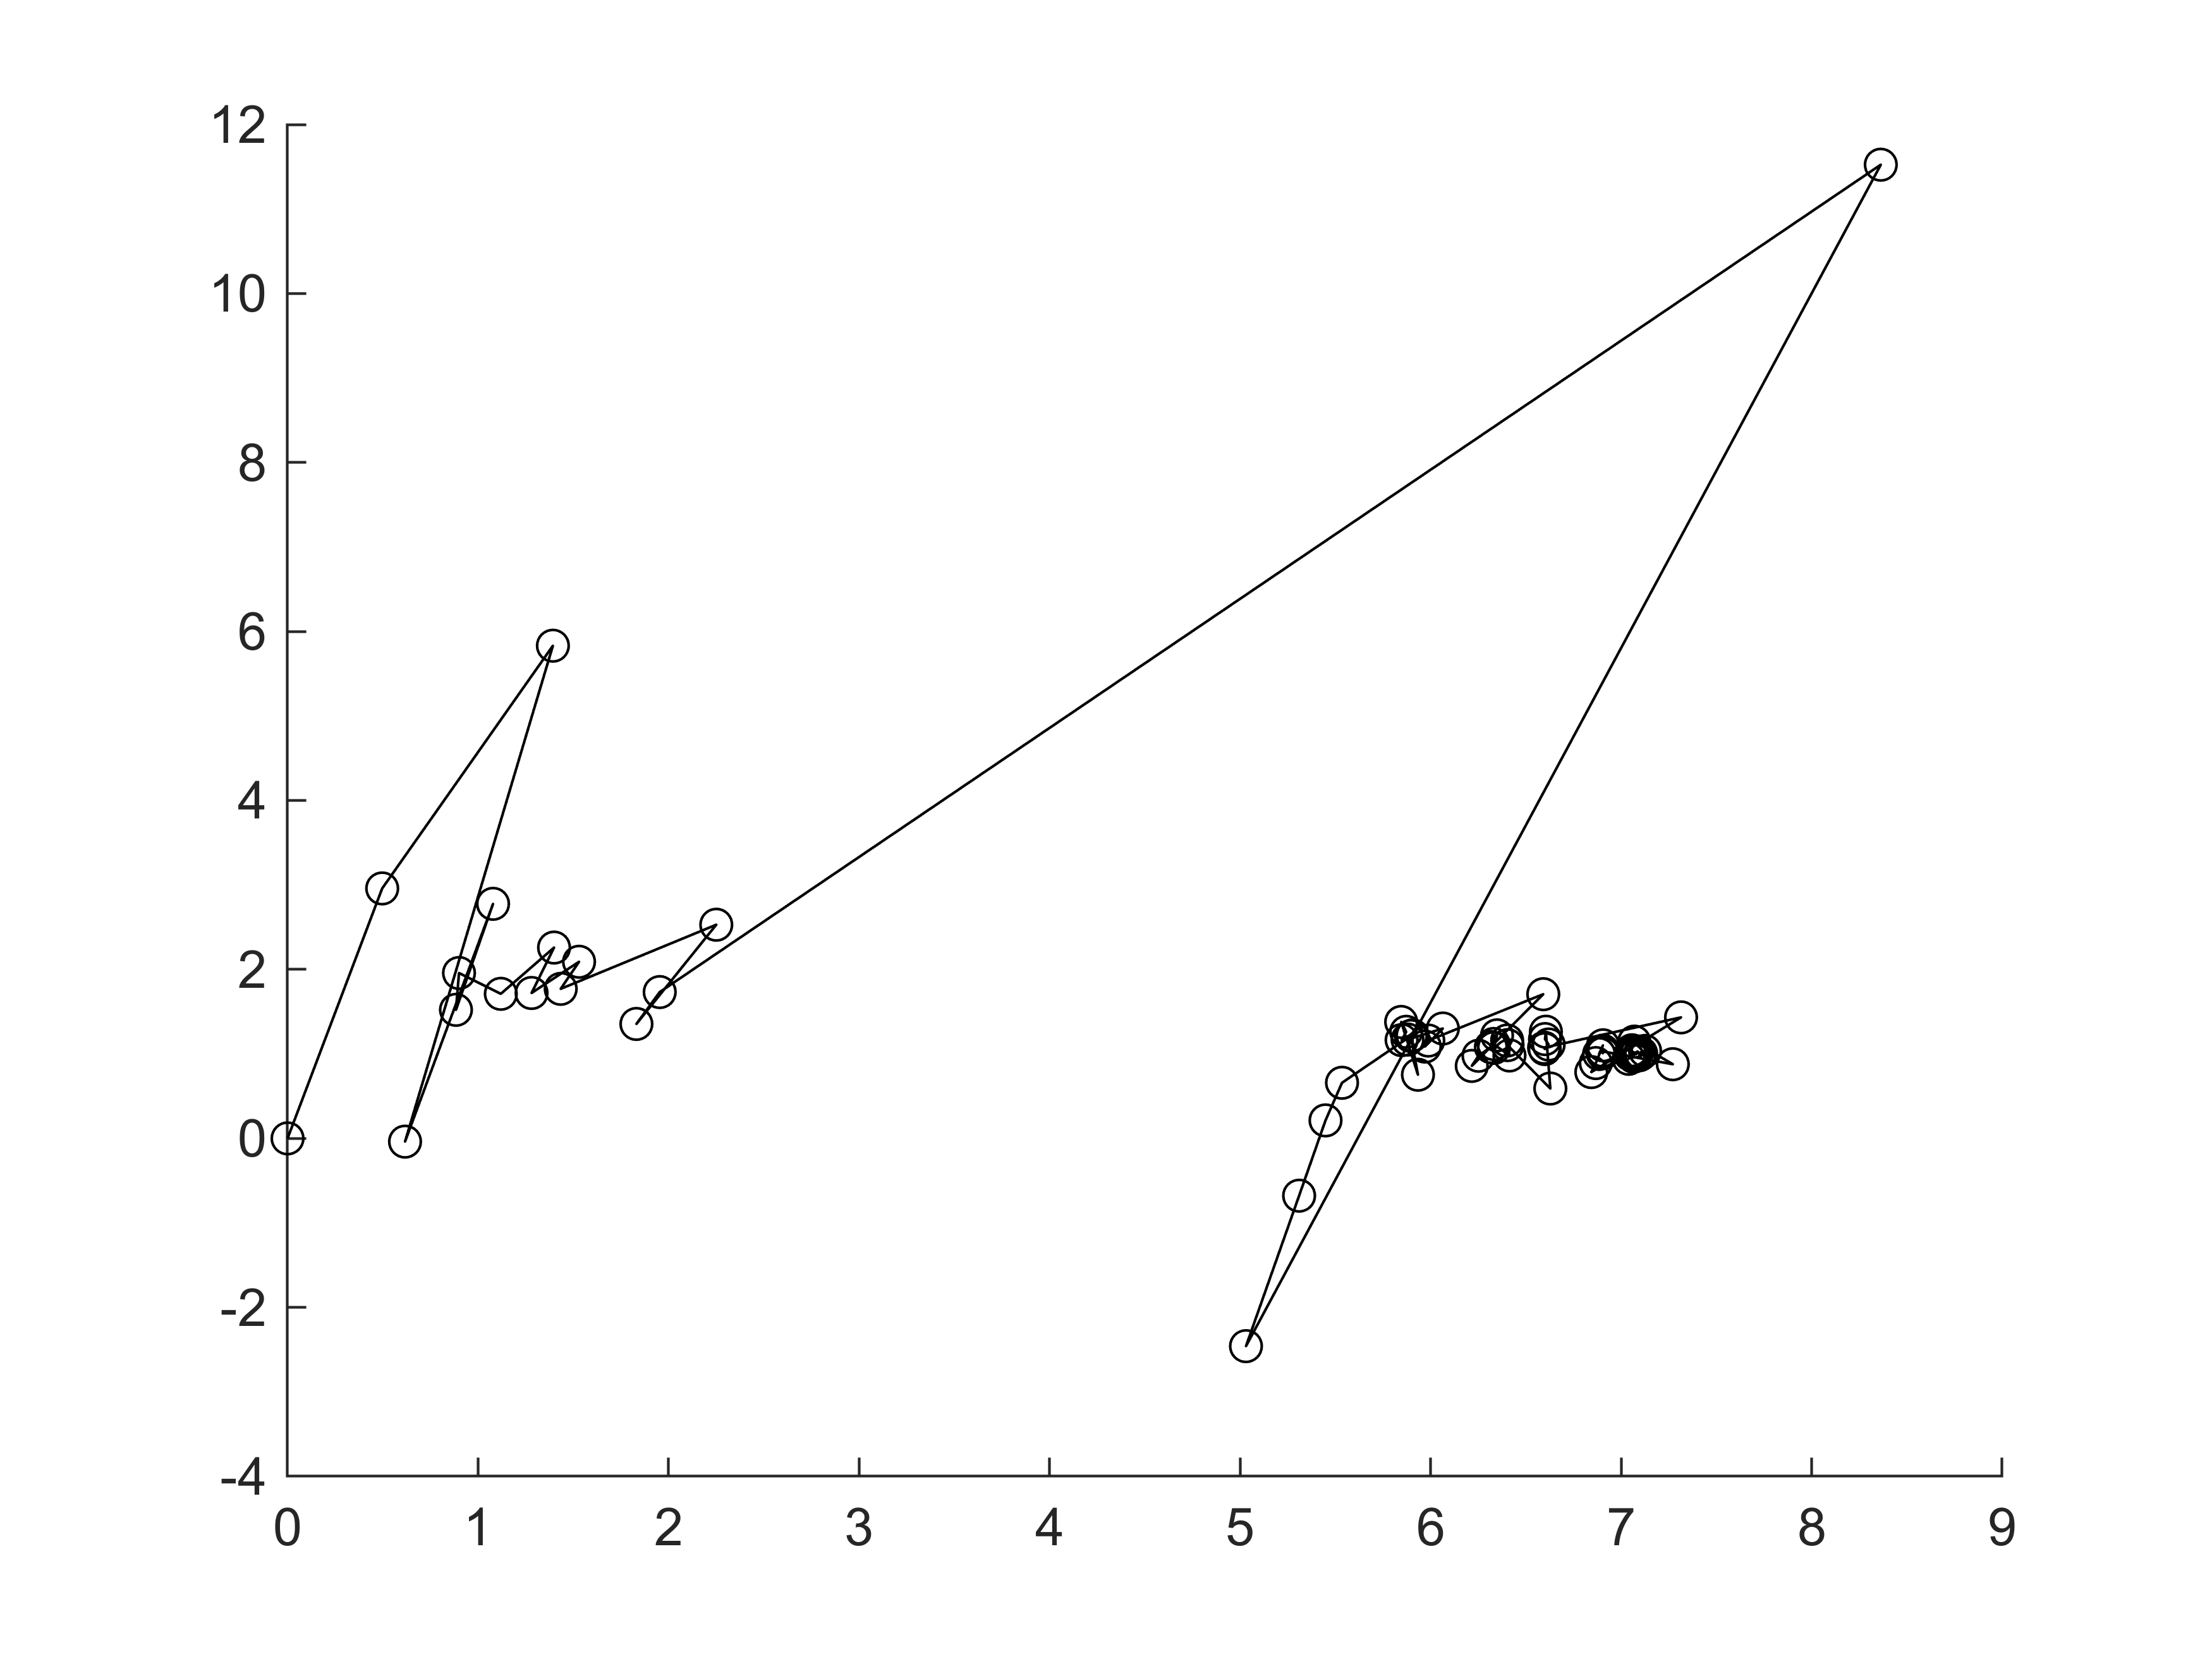

In [26]:
for ii=1:size(search_history,2)
    v = search_history(:,ii);
    addpoints(animated_Line,v(1),v(2))
    pause(0.1)
end

In [27]:
% интересно поиграться в коде с параметрами alfa и beta, которые умножают
% шаг, и уменьшают шаг, в случае неудачи


Если посмотреть на выражение для триальной функции $F({\vec{x} }_{i+1} )=F({\vec{x} }_i -\mu \hat{g} ({\vec{x} }_i )),~где~\hat{g} ({\vec{x} }_i )=\frac{\nabla F({\vec{x} }_i )}{||\nabla F({\vec{x} }_i )||}$ , как на функцию от параметра $\mu$ , то мы увидим, что для текущей итерации мы фактически имеем оптимизационую подзадачу: найти такое $\mu$ , которое давало бы минимальное значение функции:


 $argmin(F(\mu )|_{\hat{g} ,{\vec{x} }_i } )$ при фиксированных значениях $\hat{g} ({\vec{x} }_i )$ и  ${\vec{x} }_i$ . Приведенный ниже код оптимизатора решает эту подзадачу путем созданной выше функции ***grad\_search\_linesearch\_numeric.m:***

<pre>
function [x,Fval,ii,flag]=grad_search_linesearch_numeric(x0,F,gradF,options)
% простой оптимизатор методом градиентного поиска
% входные аргументы:
%                   x0 - стартовая точка
%                   F - указатель на скалярную функцию векторного аргумента
%                   gradF - указатель на функцию расчета градиента функции
%                           F
%                   Опциональные аргументы в формате имя-значение
%                   mu (optional)- амплитудный коэффициент, длина шага
%                   N (optional)- ограничение на число итераций
%                   tol (optional)- точность (относительное изменение для
%                   двух последовательных итераций)
    arguments
        x0 double
        F function_handle
        gradF function_handle
        options.mu (1,1) double =1e-2
        options.N (1,1) double =10000
        options.tol (1,1)double =1e-6
    end
    x=x0(:);mu = options.mu;N = options.N;tol = options.tol;flag=[true true];
    Fval=F(x0);ii=1;
    while ii<N && all(flag) % условием остановки служит достидение заданного числа итераций и проверка сходимости
        x_previous=x;
        F_previous = Fval; % рассчитываем значение функции
        grad_value = gradF(x); % рассчитываем градиент функции
        grad_norm = norm(grad_value);
        if grad_norm==0
            return
        end
        grad_direction = grad_value/grad_norm; % используем только направление градиента
        grad_direction = grad_direction(:);
        F_mu = @(mu_trial) F(x - mu_trial*grad_direction);% формулируем как указатель на функцию от длины шага
        gradF_mu = @(mu_trial) num_grad(F_mu,mu_trial);
        [mu,~,iter_number]=grad_search_linesearch(mu,F_mu,gradF_mu,"N",20); % используем оптимизатор с линейным поиском для решения подзадачи - оптимизации длины шага при фиксированном градиенте
        Fval = F_mu(mu);
        x = x - mu*grad_direction;
        ii=ii+iter_number;
        flag = [norm(Fval-F_previous)>tol ...
            norm(x_previous-x)>tol...
            grad_norm>tol];

    end
end

</pre>


In [28]:
[xval,Fval,ii,flag]=grad_search_linesearch_numeric([0.5 0.5],F,gradF,"mu",0.05,"N",1000)

xval = 2x1    
    7.1110
    0.9999
Fval = 3.4810e-06
ii = 567
flag = 1x3 logical array    
   0   1   1

In [29]:
disp("Ошибка фиттинга:" + string(norm(x_true-xval)))

Ошибка фиттинга:0.0010513

In [30]:
% сравнение скорости работы трех алгоритмов
tic;x_direct=grad_search([0.5 0.5],F,gradF,"mu",0.05,"N",100);
direct_time = toc

direct_time = 0.0011

In [31]:
direct_error = norm(x_true-x_direct)

direct_error = 2.7942

In [32]:

tic;x_linesearch=grad_search_linesearch([0.5 0.5],F,gradF,"mu",0.05,"N",100,"alfa",2, "beta",0.5, "tries",15);
line_search_time  = toc

line_search_time = 0.0021

In [33]:
line_search_error = norm(x_true-x_linesearch)

line_search_error = 0.0636

In [34]:

tic;x_linesearch_numeric=grad_search_linesearch_numeric([0.5 0.5],F,gradF,"mu",0.05,"N",100);
line_search_num_time = toc

line_search_num_time = 0.0018

In [35]:
linesearch_numeric_error = norm(x_true-x_linesearch_numeric)

linesearch_numeric_error = 0.0726


ДАЛЬШЕ ИДЕТ БЛОК ФУНКЦИЙ


In [36]:
function folder = get_folder()
% функция смотрит какой файл открыт в редакторе в настоящий момент и
% возвращает путь к данному файлу
    folder = fileparts(matlab.desktop.editor.getActiveFilename);
end

function [y,p] = persistent_func(f,dx)
% функция сдвигает фазу аргумента функции f на величину dx
    persistent x
    persistent animated_Line axes_handle; % при первом пуске persistent переменная []
    if isempty(x)
        x =-dx; % обнуляем сдвиг в начальный момент
    end
    if isempty(animated_Line)
        axes_handle = axes(figure(10),"XTickMode","manual","YTickMode","manual","XLim",[0,2*pi],"YLim",[-1 1]);
        animated_Line = animatedline(axes_handle,"Marker","o","LineStyle","none");
    end
    x=x+dx;
    y = f(x);
    addpoints(animated_Line,x,y);
    drawnow
end

function [new_ax,fig_handle] = get_next_ax(index)
% функция, которая возвращает новые оси на новой фигуре
    arguments
        index = []
    end
    persistent N;
    if isempty(index)
        if isempty(N)
            N=1;
        else
            N  = N+1;
        end
        fig_handle = figure(N);
        clf(fig_handle);
        new_ax = axes(fig_handle);
        disp("fig"+ N)
    else
        fig_handle = figure(index);
        clf(fig_handle);
        new_ax = axes(fig_handle);
    end
end